# 實作PGGAN演算法，產生名人臉部
### 程式修改自[High-quality image generation of fashion, celebrity faces](https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/)

## 載入相關套件

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

## 載入預先訓練好的模型

In [2]:
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to C:\Users\mikec/.cache\torch\hub\hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to C:\Users\mikec/.cache\torch\hub\checkpoints\celebaHQ16_december_s7_i96000-9c72988c.pth


  0%|          | 0.00/264M [00:00<?, ?B/s]

Average network found !


## 產生圖像

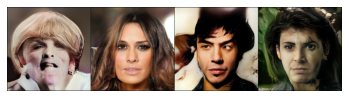

In [5]:
# 產生圖像個數
num_images = 4
# 產生雜訊資料
noise, _ = model.buildNoiseData(num_images)
# 產生圖像
with torch.no_grad():
    generated_images = model.test(noise)

# clamp 使像素值介於 [0, 1] 之間
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1)
                                   , scale_each=True, normalize=True)
# permute 設定色彩通道在最後一維
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.axis('off');